# Numerische Integration

## Übungsblatt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def trapz(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    return 0.5 * h * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


def trapz_data(x, y):
    return 0.5 * np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1]))


### Aufgabe 1

Die Funktion 

$$ f(x) = \cos\left( 2 \pi x (1 + x) \right) $$

deren Ableitung wir bereits mal numerisch berechnet haben soll nun integriert werden:

$$ S = \int_{-1}^1 f(x) \, dx $$

1. Berechne $S$ mit [Wolfram|Alpha](https://www.wolframalpha.com).
2. Berechne $S$ mit der passenden Funktion aus `scipy.integrate`.
3. Berechne $S$ mit der passenden Variante der Trapezregel für unterschiedliche Anzahl Intervalle $n$. Bestimme $n$, so dass der absolute Fehler verglichen mit dem Resultat von `scipy.integrate` kleiner als $10^{-10}$ ist.

In [2]:
# 1. Wolfram|Alpha

# https://www.wolframalpha.com/input?i=int+cos%28+2+%5Cpi+x+%281+%2B+x%29+%29+from+-1+to+1
s1 = 0.467286


In [3]:
# 2. SciPy


def f(x):
    return np.cos(2 * np.pi * x * (1 + x))


s2, s2_error = scipy.integrate.quad(f, -1, 1)
print(s2, s2_error)


0.467286073178865 6.878597129946989e-13


In [4]:
# 3. Trapezregel

s3 = trapz(f, -1, 1, 100)
s3


0.467286285590903

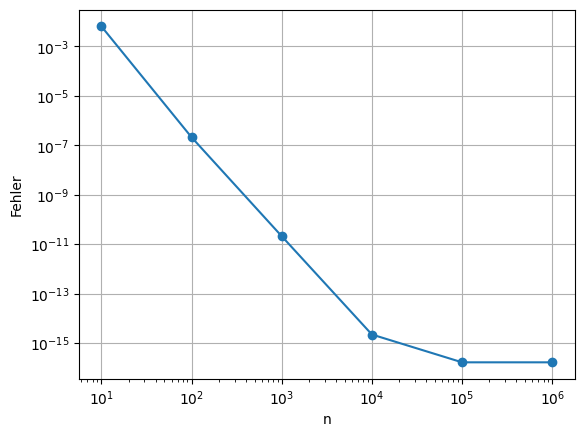

In [5]:
ns = np.logspace(1, 6, 6, dtype=int)
s3s = np.array([trapz(f, -1, 1, n) for n in ns])
s3_errors = np.abs(s3s - s2)

plt.loglog(ns, s3_errors, "o-")
plt.xlabel("n")
plt.ylabel("Fehler")
plt.grid()
plt.show()


Also muss $n\approx 10^{3}$ gewählt werden.

### Aufgabe 2: Wasserverbrauch

#### a) Daten einlesen, darstellen, verstehen

1. Lies die Daten in `Wasserverbrauch.csv` ein.
2. Stelle den Wasserverbrauch in Abhängigkeit der Zeit dar.
3. Schreibe die Achsen mit den korrekten Variablen und deren Einheiten an.
4. Bestimme die Einheit des Integrals über den Wasserverbrauch. Also was ist die Bedeutung der Fläche unter dieser Kurve?

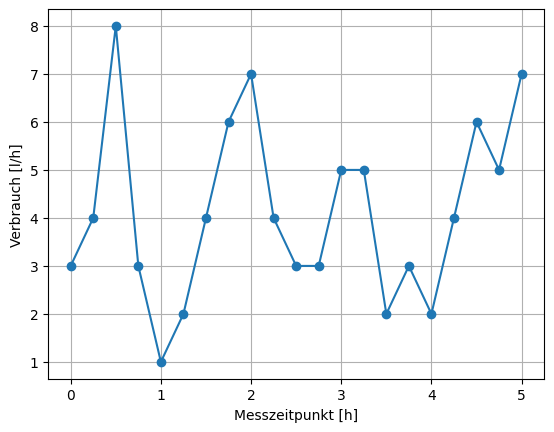

In [6]:
wasserverbrauch = np.loadtxt("Wasserverbrauch.csv", delimiter=";", skiprows=1)
zeit, verbrauch = wasserverbrauch.T

plt.plot(zeit, verbrauch, "o-")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Verbrauch [l/h]")
plt.grid()
plt.show()


Das Integral über den Verbrauch (in l/h) ist die Wassermenge in Litern, die im integrierten Zeitraum verbraucht wurde.

#### b) Daten integrieren

Bestimme den Wasserverbrauch von $t=2$ bis und mit $t=5$.

Benutze dazu einmal passende Trapezregel-Funktion (zuoberst bereits definiert) und einmal [`scipy.integrate`](https://docs.scipy.org/doc/scipy/tutorial/integrate.html).

In [7]:
bereich = (zeit >= 2) & (zeit <= 5)
trapz_data(zeit[bereich], verbrauch[bereich])


12.25

In [8]:
scipy.integrate.trapezoid(verbrauch[bereich], zeit[bereich])


12.25

#### c) Integrierten Bereich darstellen (optional)

Stelle die Fläche unter dem Graphen zwischen $t=2$ und $t=5$ mithilfe von [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) dar.

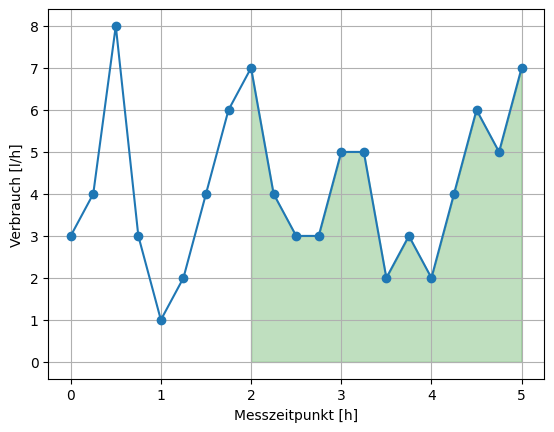

In [9]:
plt.plot(zeit, verbrauch, "o-")
plt.fill_between(zeit[bereich], verbrauch[bereich], alpha=0.25, color="green")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Verbrauch [l/h]")
plt.grid()
plt.show()


### Aufgabe 3: Temperaturen in Davos

Hier werden wir Daten zuerst interpolieren, um die Nullstellen bestimmen zu können. Dann wird zwischen den Nullstellen integriert.

#### a) Daten einlesen, darstellen, verstehen

- Lies die Daten in `TemperaturWeihnachten.csv` ein. Diese enthalten den Temperaturverlauf vom 24. und 25. Dezember in Davos.
- Stelle die Temperatur in Abhängigkeit der Zeit dar mit den korrekten Achsenbeschriftungen inklusive Einheiten.

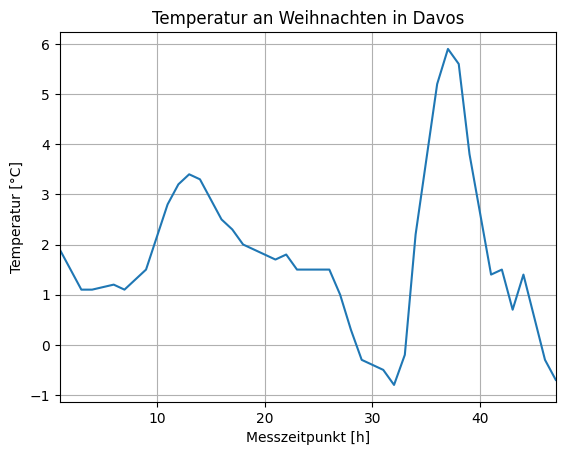

In [10]:
davos = np.loadtxt("TemperaturWeihnachten.csv", delimiter=",", skiprows=1)
t, temperature = davos.T

plt.plot(t, temperature)
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Temperatur an Weihnachten in Davos")
plt.xlim(t.min(), t.max())
plt.grid()
plt.show()


#### b) Interpolation

- Interpoliere die Daten im Bereich $t \in [1,47]$ an 500 Punkten.
- Stelle die Interpolationsfunktion grafisch dar.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)


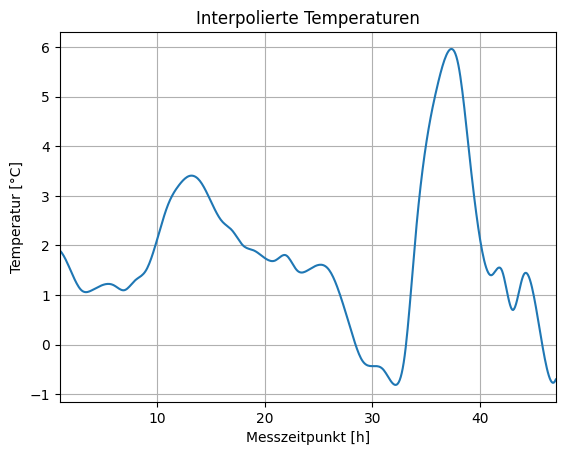

In [11]:
temp_interpolation = scipy.interpolate.interp1d(
    t, temperature, kind="cubic", fill_value="extrapolate"
)

t_inter = np.linspace(1, 47, 500)
T_inter = temp_interpolation(t_inter)

plt.plot(t_inter, T_inter)
plt.title("Interpolierte Temperaturen")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.xlim(t_inter.min(), t_inter.max())
plt.grid()
plt.show()


#### c) Nullstellen bestimmen

Im Diagramm von b) ist ersichtlich, dass die Temperatur an 3 Stellen durch 0 geht.

- Finde alle drei Nullstellen.
- Stelle sie im Diagramm als rote Punkte dar.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`scipy.optimize.bisect`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
- [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)


In [12]:
# NST finden

zero1 = scipy.optimize.bisect(temp_interpolation, 28, 31)
zero2 = scipy.optimize.newton(temp_interpolation, x0=33)
zero3 = scipy.optimize.newton(temp_interpolation, x0=40)
print(
    f"Die drei Nullstellen befinden sich bei, {zero1:.2f}, {zero2:.2f} und {zero3:.2f}."
)


Die drei Nullstellen befinden sich bei, 28.43, 33.11 und 45.75.


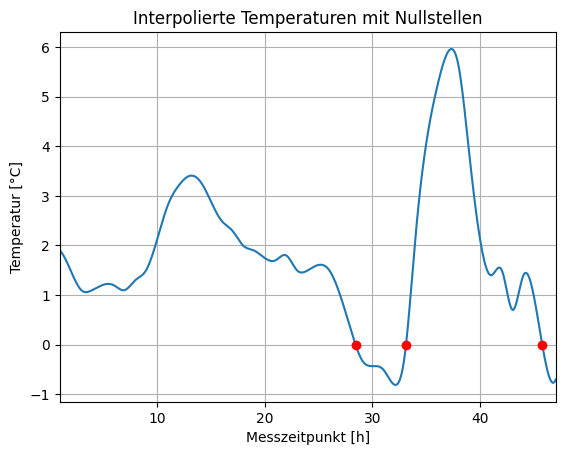

In [13]:
plt.plot(t_inter, T_inter)
plt.plot([zero1, zero2, zero3], [0, 0, 0], "or")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Interpolierte Temperaturen mit Nullstellen")
plt.xlim(t_inter.min(), t_inter.max())
plt.grid()
plt.show()


#### c) Mittlere Temperatur bestimmen

Berechnen wir die durchschnittliche Temperatur zwischen der 1. und 3. Nullstelle.

Der Mittelwert einer Funktion $f(x)$ zwischen $a$ und $b$ ist definiert als

$$ \frac{1}{b-a} \int_a^b f(x) \, dx $$

- Schreibe eine Funktion `mean_func(func, a, b)`, welche die den Mittelwert einer Funktion `func` zwischen zwei werten `a` und `b` mithilfe von SciPy berechnet.
- Benutze diese, um die mittlere Temperatur zwischen der zweiten und dritten Nullstelle zu berechnen.


In [14]:
def mean_func(func, a, b):
    integral, error = scipy.integrate.quad(func, a, b)
    return integral / (b - a)


mean_temp = mean_func(temp_interpolation, zero1, zero3)
mean_temp


1.8822611800545666

#### d) Darstellung

- Stelle das Integral in dem Diagramm aus der Aufgabe c) mithilfe von [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) dar.
- Plotte dazu den Mittelwert zwischen der 1. und 3. Nullstelle als konstante Funktion.

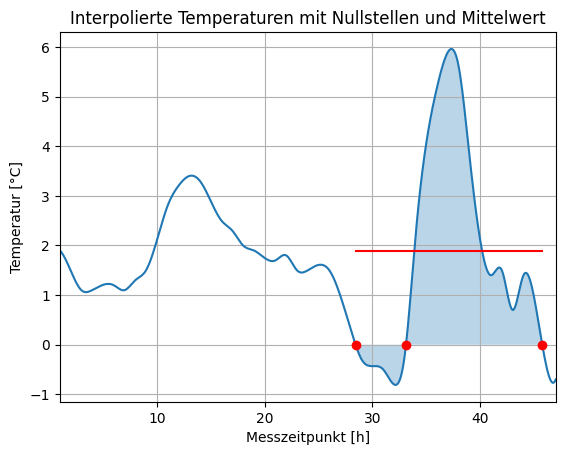

In [15]:
ind = (t_inter >= zero1) & (t_inter <= zero3)

plt.plot(t_inter, T_inter)
plt.fill_between(t_inter[ind], T_inter[ind], alpha=0.3)
plt.plot([zero1, zero3], [mean_temp, mean_temp], "r")
plt.plot([zero1, zero2, zero3], [0, 0, 0], "or")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("Temperatur [°C]")
plt.title("Interpolierte Temperaturen mit Nullstellen und Mittelwert")
plt.xlim(t_inter.min(), t_inter.max())
plt.grid()
plt.show()
